In [61]:
import torch as th

# Transforms are common image transformations
import torchvision.transforms as T

# To load image we will import request library
import requests

# To open images, draw box around the image and display label text 
from PIL import Image, ImageDraw, ImageFont

In [62]:
#importing model from github repository

model = th.hub.load('facebookresearch/detr', 'detr_resnet101', pretrained=True)
model.eval()
#putting model on GPU for fast computing
model = model.cuda()

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_master


In [63]:
# Displaying the model
model

DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): _LinearWithBias(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): _LinearWithBias(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
       

In [64]:
# Now we will use standard mean and standard deviation for input image normalization
# Remember we declared "import torchvision.transforms as T"
# We run image through tensor to convert it from PIL imsge to binary file or tensor
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [65]:
# Taking input image use any image from online and "Copy image address and paste in input field"
url = input()

https://i5.walmartimages.com/asr/cff69f0d-562c-49c0-98bc-e6c505ad01f0_1.a361190d4953de73ee8e0ad50f4eabbc.jpeg?odnHeight=2000&odnWidth=2000&odnBg=ffffff


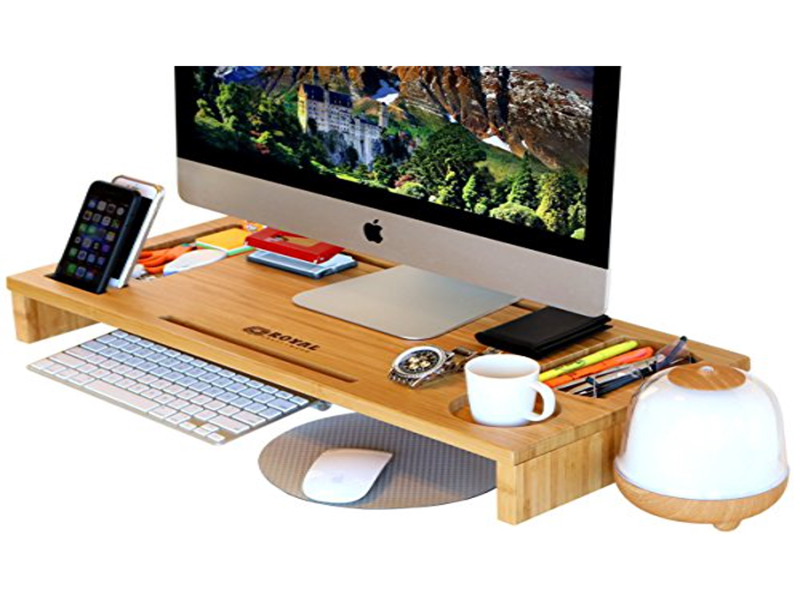

In [66]:
img = Image.open(requests.get(url, stream=True).raw).resize((800,600)).convert('RGB')
img

In [67]:
#transforming image from tensor
img_tens = transform(img).unsqueeze(0).cuda()

In [68]:
with th.no_grad():
  output = model(img_tens)

In [72]:
#displaying output it is a dictionary. We are getting class labels and bounding boxes
output

{'pred_boxes': tensor([[[0.2529, 0.4247, 0.1153, 0.0601],
          [0.5290, 0.6100, 0.0712, 0.0548],
          [0.2517, 0.4207, 0.1186, 0.0629],
          [0.7894, 0.6114, 0.1340, 0.0980],
          [0.7916, 0.6238, 0.1292, 0.0697],
          [0.4979, 0.3738, 0.5698, 0.5742],
          [0.4603, 0.5164, 0.8102, 0.4370],
          [0.5330, 0.6070, 0.0886, 0.0665],
          [0.3964, 0.5582, 0.7299, 0.4898],
          [0.1265, 0.3724, 0.0616, 0.1212],
          [0.5203, 0.5987, 0.0533, 0.0439],
          [0.7796, 0.6089, 0.1683, 0.1126],
          [0.1729, 0.3867, 0.0721, 0.1780],
          [0.3720, 0.4135, 0.1207, 0.0545],
          [0.6370, 0.6482, 0.1126, 0.1195],
          [0.4967, 0.3292, 0.5603, 0.4743],
          [0.5130, 0.6058, 0.0495, 0.0454],
          [0.1101, 0.3867, 0.0899, 0.1747],
          [0.7331, 0.6014, 0.1373, 0.0824],
          [0.3560, 0.6368, 0.6513, 0.3431],
          [0.1920, 0.3813, 0.1123, 0.1867],
          [0.7563, 0.5901, 0.0950, 0.0478],
          [0.1697,

In [77]:
# Predicting boxes in image
# Predicting Logits: Logits simply means that the function operates on the unscaled output of earlier layers
# Log-odds function, is a function that represents probability values from 0 to 1, and negative infinity to infinity. The function is an inverse to the sigmoid function that limits values between 0 and 1 across the Y-axis

output['pred_logits'][0].shape
output['pred_boxes'][0].shape
len(CLASSES)

91

In [69]:
#Making copy of image to draw bounding boxes 
im2 = img.copy()
drw = ImageDraw.Draw(im2)
#Restricting prediction to one less forcast from class
pred_logits=output['pred_logits'][0][:, :len(CLASSES)]
pred_boxes=output['pred_boxes'][0]

#Using softmax to normalise distribution of forcasting
max_output = pred_logits.softmax(-1).max(-1)
# It will give all the predictions in a box so we are restricting it to show to 8 classes it is sure about
topk = max_output.values.topk(8)

pred_logits = pred_logits[topk.indices]
pred_boxes = pred_boxes[topk.indices]
pred_logits.shape
#Displaying number of predictions against classes

torch.Size([8, 91])

In [70]:

# We are joining both to make detector detect what is in the image
for logits, box in zip(pred_logits, pred_boxes):
  cls = logits.argmax()
  if cls >= len(CLASSES):
    continue
  label = CLASSES[cls]
  print(label)

  # Making bounding boxes. We know from paper they calculate from center
  # We are going to calculate it on CPU for quick results
  box = box.cpu() * th.Tensor([800, 600, 800, 600])
  x, y, w, h = box
  x0, x1 = x-w//2, x+w//2
  y0, y1 = y-h//2, y+h//2
  #drawing rectangle using PIL library
  drw.rectangle([x0, y0, x1, y1], outline='Red', width=5)
  #writing label of object detected in image
  drw.text((x, y), label, fill='Yellow')

tv
keyboard
cell phone
mouse
cup
tv
cell phone
tv


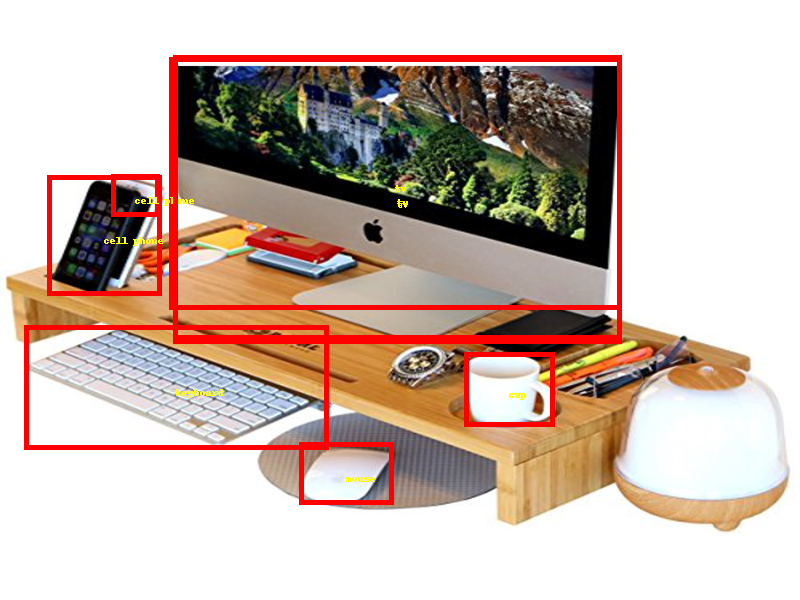

In [71]:
im2